# Phase 1: Dataset Selection and Preprocessing

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score  # Metrics suitable for regression
from sklearn.metrics import f1_score # Metrics suitable for linearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import median_absolute_error # Metrics suitable for linearRegression
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("apartments_for_rent_classified_100K.csv", encoding='latin1', delimiter=';')
#read file

/var/folders/k0/1nchlx_j5djdx0h7q49d10rm0000gn/T/ipykernel_90588/1109218540.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("apartments_for_rent_classified_100K.csv", encoding='latin1', delimiter=';')


In [3]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [4]:
df.shape

(99492, 22)

In [5]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

# Phase 2: Exploratory Data Analysis (EDA) and Feature Selection

In [6]:
selected_columns = ['bathrooms', 'bedrooms', 'square_feet', 'cityname', 'price']

# Create a new DataFrame with only the selected columns
df = df[selected_columns]
df.head()

,bathrooms,bedrooms,square_feet,cityname,price
0,1.0,1.0,542,Redondo Beach,2195.0
1,1.5,3.0,1500,Newport News,1250.0
2,2.0,3.0,1650,Raleigh,1395.0
3,1.0,2.0,820,Vacaville,1600.0
4,1.0,1.0,624,Albuquerque,975.0


<Axes: xlabel='bedrooms'>

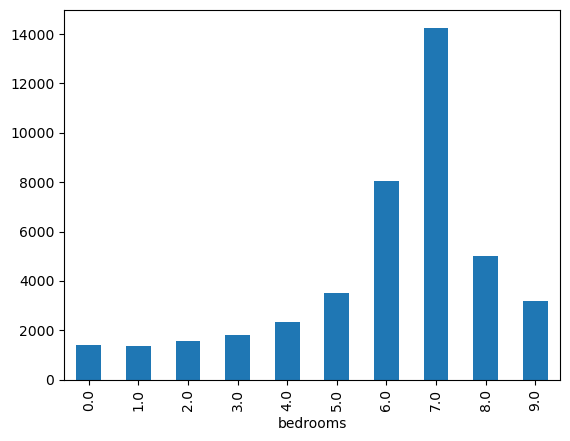

In [7]:
df.groupby('bedrooms')['price'].mean().plot(kind='bar')

<Axes: xlabel='bedrooms', ylabel='price'>

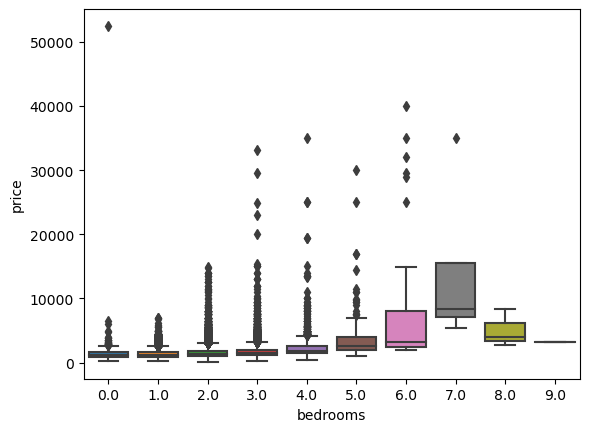

In [8]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

In [9]:
df.isnull().sum()

bathrooms       63
bedrooms       124
square_feet      0
cityname       302
price            1
dtype: int64

# Dealing with Null Values

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

bathrooms      0
bedrooms       0
square_feet    0
cityname       0
price          0
dtype: int64

In [12]:
df.shape

(99007, 5)

In [13]:
df.describe()

,bathrooms,bedrooms,square_feet,price
count,99007.000000,99007.000000,99007.000000,99007.000000
mean,1.445893,1.728696,956.072651,1525.646197
std,0.547158,0.748697,365.387944,898.955283
min,1.000000,0.000000,107.000000,100.000000
25%,1.000000,1.000000,730.000000,1013.500000
50%,1.000000,2.000000,900.000000,1350.000000
75%,2.000000,2.000000,1115.000000,1795.000000
max,9.000000,9.000000,12000.000000,52500.000000


In [14]:
df.cityname.unique()

array(['Redondo Beach', 'Newport News', 'Raleigh', ..., 'Osseo', 'Vestal',
       'Albertville'], dtype=object)

In [15]:
df['cityname'] = df['cityname'].apply(lambda x: x.strip())
loction_stats = df.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)
loction_stats

cityname
Dallas         2854
Denver         2751
Los Angeles    2401
Las Vegas      1846
Arlington      1571
               ... 
Clearfield        1
Grand Lake        1
Maiden            1
Clawson           1
Santa Fe          1
Name: cityname, Length: 2977, dtype: int64

In [16]:
len(loction_stats[loction_stats<=10])

1977

In [17]:
loction_stats_less_than_10 = loction_stats[loction_stats<=10]
loction_stats_less_than_10

cityname
Brookfield       10
Fort Mitchell    10
Macomb           10
Ashtabula        10
Abilene          10
                 ..
Clearfield        1
Grand Lake        1
Maiden            1
Clawson           1
Santa Fe          1
Name: cityname, Length: 1977, dtype: int64

In [18]:
len(df.cityname.unique())

2977

In [19]:
df.cityname = df.cityname.apply(lambda x: 'other' if x in loction_stats_less_than_10 else x)
len(df.cityname.unique())

1001

In [20]:
df.shape

(99007, 5)

In [21]:
df[df.square_feet/df.bedrooms<250].head()

,bathrooms,bedrooms,square_feet,cityname,price
19,1.0,2.0,435,Portland,1250.0
48,1.0,2.0,431,Arlington,1549.0
53,1.0,2.0,314,Ogden,650.0
55,1.0,2.0,390,Providence,2095.0
82,1.0,2.0,468,Omaha,885.0


In [22]:
zero_bed_rows = df[df['bedrooms'] == 0]
print(len(zero_bed_rows))

645


In [23]:
df[df.square_feet/df.bedrooms<250].shape

(1480, 5)

In [24]:
df1 = df[~(df.square_feet/df.bedrooms<250)]
df1.shape

(97527, 5)

In [25]:
df1.square_feet.describe()

count    97527.000000
mean       963.118090
std        363.269291
min        107.000000
25%        738.000000
50%        907.000000
75%       1120.000000
max      12000.000000
Name: square_feet, dtype: float64

In [26]:
df1.isnull().sum()

bathrooms      0
bedrooms       0
square_feet    0
cityname       0
price          0
dtype: int64

# FEATURE ENGINEERING

In [27]:
df2 = df1.copy() # calculating price oer sqft
df2['price_per_sqft'] = df2['price']*100000/df2['square_feet']
df2.head()

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,542,Redondo Beach,2195.0,404981.549815
1,1.5,3.0,1500,Newport News,1250.0,83333.333333
2,2.0,3.0,1650,Raleigh,1395.0,84545.454545
3,1.0,2.0,820,Vacaville,1600.0,195121.951220
4,1.0,1.0,624,Albuquerque,975.0,156250.000000


# REMOVING OUTLIERS

In [28]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('cityname'):
        m = np.mean(subdf.price_per_sqft)#mean
        st = np.std(subdf.price_per_sqft)#sandered deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        #beyond the deviation
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df2)
df7.shape

(71566, 6)

In [29]:
df7 = df7[df7['bedrooms'] > 0]

In [30]:
df7

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,976,Aberdeen,1455.0,149077.868852
1,1.0,2.0,837,Aberdeen,1088.0,129988.052569
2,2.0,2.0,1172,Aberdeen,1477.0,126023.890785
3,2.0,2.0,1187,Aberdeen,1722.0,145071.609099
4,1.0,2.0,1014,Aberdeen,1370.0,135108.481262
...,...,...,...,...,...,...
71561,2.0,2.0,1162,other,930.0,80034.423408
71562,3.5,6.0,3980,other,2195.0,55150.753769
71563,2.5,4.0,2932,other,1850.0,63096.862210
71564,2.0,2.0,1000,other,1314.0,131400.000000


# OUTLIERS IN SQ.FEET AND OUTLIERS

In [31]:
sqft_mean = df7['square_feet'].mean()
sqft_std = df7['square_feet'].std()
price_mean = df7['price'].mean()
price_std = df7['price'].std()

df7 = df7[(np.abs(df7['square_feet'] - sqft_mean) < (3 * sqft_std)) &
        (np.abs(df7['price'] - price_mean) < (3 * price_std))]

# Check ranges
df7 = df7[(df7['bathrooms'] >= 0) &
        (df7['bedrooms'] >= 0) &
        (df7['square_feet'] > 0) &
        (df7['price'] > 0)]

# Log transform skewed data
df7['price'] = np.log(df7['price'])

# Remove any remaining outliers
df7 = df7[df7['price'] < df7['price'].mean() + 3*df7['price'].std()]

df7.shape

(69672, 6)

In [32]:
df7.describe()

,bathrooms,bedrooms,square_feet,price,price_per_sqft
count,69672.000000,69672.000000,69672.000000,69672.000000,69672.000000
mean,1.443952,1.693736,938.740312,7.198358,157851.215628
std,0.510087,0.659132,244.479368,0.393086,63910.122288
min,1.000000,1.000000,250.000000,5.298317,40384.615385
25%,1.000000,1.000000,750.000000,6.920672,113909.984841
50%,1.000000,2.000000,910.000000,7.192934,142335.030398
75%,2.000000,2.000000,1102.000000,7.452402,185000.000000
max,4.000000,6.000000,1874.000000,8.259976,706319.702602


In [33]:
df7 = df7.dropna(subset=['cityname'])

In [34]:
df7.shape

(69672, 6)

In [35]:
df7

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,976,Aberdeen,7.282761,149077.868852
1,1.0,2.0,837,Aberdeen,6.992096,129988.052569
2,2.0,2.0,1172,Aberdeen,7.297768,126023.890785
3,2.0,2.0,1187,Aberdeen,7.451242,145071.609099
4,1.0,2.0,1014,Aberdeen,7.222566,135108.481262
...,...,...,...,...,...,...
71559,1.0,2.0,1317,other,6.991177,82536.066819
71560,2.0,2.0,1162,other,6.877296,83476.764200
71561,2.0,2.0,1162,other,6.835185,80034.423408
71564,2.0,2.0,1000,other,7.180831,131400.000000


# ONE HOT ENCODING 

In [36]:
dummies = pd.get_dummies(df7['cityname'], dummy_na=True)
dummies = dummies.astype(int)
print(dummies.head(3))

   Aberdeen  Abingdon  Abington  Absecon  Acton  Addison  Akron  Albuquerque  \
0         1         0         0        0      0        0      0            0   
1         1         0         0        0      0        0      0            0   
2         1         0         0        0      0        0      0            0   

   Alexandria  Alhambra  ...  Youngstown  Ypsilanti  Yukon  Yulee  Yuma  \
0           0         0  ...           0          0      0      0     0   
1           0         0  ...           0          0      0      0     0   
2           0         0  ...           0          0      0      0     0   

   Zachary  Zebulon  Zephyrhills  other  NaN  
0        0        0            0      0    0  
1        0        0            0      0    0  
2        0        0            0      0    0  

[3 rows x 1002 columns]


In [37]:
df8 = pd.concat([df7,dummies.drop('other', axis= 'columns')], axis = 'columns') #adding city in unique form of 0 and 1
df8.head()

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft,Aberdeen,Abingdon,Abington,Absecon,...,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,NaN
0,1.0,1.0,976,Aberdeen,7.282761,149077.868852,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,837,Aberdeen,6.992096,129988.052569,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1172,Aberdeen,7.297768,126023.890785,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1187,Aberdeen,7.451242,145071.609099,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,1014,Aberdeen,7.222566,135108.481262,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df9 = df8.drop('cityname',axis = 'columns') #now no need of cityname
df9.head()

,bathrooms,bedrooms,square_feet,price,price_per_sqft,Aberdeen,Abingdon,Abington,Absecon,Acton,...,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,NaN
0,1.0,1.0,976,7.282761,149077.868852,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,837,6.992096,129988.052569,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1172,7.297768,126023.890785,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1187,7.451242,145071.609099,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,1014,7.222566,135108.481262,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# FEATURE SELECTION

In [39]:
selected_columns = ['bathrooms', 'bedrooms', 'square_feet']
# Create a new DataFrame with only the selected columns
features = df9.drop('price',axis='columns')
target = df9['price']

In [40]:
features.columns = features.columns.astype(str)

# TRAIN AND TEST DATA SPLITTING

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=30)

# Phase 3: Model Implementation and Baseline Evaluation

# SUPERVISED LEARNING

# LINEAR REGRESSION 

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Make predictions on test set
y_pred = model.predict(X_test)

In [44]:
model.score(X_test,y_test)

0.9654998256908173

In [45]:
median = np.median(y_test)


# Bin into 2 classes
y_test = (y_test > median).astype(int)
y_pred= (y_pred > median).astype(int)

f1 = f1_score(y_test, y_pred)

In [46]:
f1

0.9595863977281003

# RANDOM FOREST REGRESSOR

In [47]:
# Assuming df9 is your DataFrame and it's already loaded

# Preprocessing
X = df9.drop('price', axis=1)  # Features
y = df9['price']  # Target variable

# Convert categorical variables to dummy variables (if any)
X = pd.get_dummies(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = rf_regressor.predict(X_test_scaled)

# Model Evaluation
# Using Mean Squared Error (MSE) and R-squared (R2) as metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
model.score(X_test,y_test)

Mean Squared Error: 0.00
R-squared: 1.00


0.9655529972481208

# RANDOM FOREST CLASSIFIER

In [48]:
df_copy = df9.copy()

# Convert all column names in the copy to strings
df_copy.columns = df_copy.columns.astype(str)

# Binning the 'price' into 'Low', 'Medium', 'High' categories in the copy
price_bins = [df_copy['price'].min(), df_copy['price'].quantile(0.33), df_copy['price'].quantile(0.66), df_copy['price'].max()]
price_labels = ['Low', 'Medium', 'High']
df_copy['price_category'] = pd.cut(df_copy['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Encode categorical variables including the target 'price_category' in the copy
label_encoder = LabelEncoder()
df_copy['price_category'] = label_encoder.fit_transform(df_copy['price_category'])

for column in df_copy.select_dtypes(include=['object']).columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Preparing features and the newly created categorical target from the copy
X = df_copy.drop(['price', 'price_category'], axis=1)
y = df_copy['price_category']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (optional for Random Forest, but included for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4716
           1       0.99      0.99      0.99      4598
           2       0.97      0.98      0.97      4621

    accuracy                           0.98     13935
   macro avg       0.98      0.98      0.98     13935
weighted avg       0.98      0.98      0.98     13935



# NEURAL NETWORKS REGRESSOR

In [49]:
# Convert categorical variables to dummy variables (if any)
X = pd.get_dummies(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the MLP Regressor with reduced complexity
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,), max_iter=100, random_state=42, solver='adam')

# Training the MLP Regressor model
mlp_regressor.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = mlp_regressor.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.16
R-squared: 0.75


/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# NEURAL NETWORKS CLASSIFIER

In [50]:
# Preparing features and target for MLP
X = df_copy.drop(['price', 'price_category'], axis=1)
y = df_copy['price_category']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)

# Training the MLP Classifier
mlp_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluating the MLP Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4716
           1       0.97      0.99      0.98      4598
           2       0.96      0.96      0.96      4621

    accuracy                           0.97     13935
   macro avg       0.97      0.97      0.97     13935
weighted avg       0.97      0.97      0.97     13935



In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
# Assuming df9 is your DataFrame with a 'price' column
df_copy = df9.copy()

# Convert all column names in the copy to strings
df_copy.columns = df_copy.columns.astype(str)

# Binning the 'price' into 'Low', 'Medium', 'High' categories in the copy
price_bins = [df_copy['price'].min(), df_copy['price'].quantile(0.33), df_copy['price'].quantile(0.66), df_copy['price'].max()]
price_labels = ['Low', 'Medium', 'High']
df_copy['price_category'] = pd.cut(df_copy['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Encode categorical variables including the target 'price_category' in the copy
label_encoder = LabelEncoder()
df_copy['price_category'] = label_encoder.fit_transform(df_copy['price_category'])

for column in df_copy.select_dtypes(include=['object']).columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Preparing features and the newly created categorical target from the copy
X = df_copy.drop(['price', 'price_category'], axis=1)
y = df_copy['price_category']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4716
           1       0.99      0.99      0.99      4598
           2       0.99      0.99      0.99      4621

    accuracy                           0.99     13935
   macro avg       0.99      0.99      0.99     13935
weighted avg       0.99      0.99      0.99     13935



# Phase 4: Hyperparameter Tuning

# Grid search

In [53]:
# Assuming df_copy has been preprocessed as per your initial steps

# Optionally, sample a subset of the data for faster execution
# df_copy = df_copy.sample(frac=0.1, random_state=42)

# Preparing features and target for MLP
X = df_copy.drop(['price', 'price_category'], axis=1)
y = df_copy['price_category']

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up a more constrained parameter space
parameter_space = {
    'hidden_layer_sizes': [(10,), (20,)],  # Further reduced complexity
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],  # Only one option to minimize variation
}

# Initialize the MLP Classifier with reduced max_iter for quicker execution
mlp = MLPClassifier(max_iter=50, random_state=42)  # Further reduced max_iter

# Setup RandomizedSearchCV with only 4 iterations for speed
rand_clf = RandomizedSearchCV(mlp, parameter_space, n_iter=4, random_state=42, n_jobs=-1, cv=2)

# Fit RandomizedSearchCV
rand_clf.fit(X_train_scaled, y_train)

# Best parameter set
print('Best parameters found:\n', rand_clf.best_params_)



# Making predictions with the best estimator
y_pred = rand_clf.predict(X_test_scaled)

# Evaluating the best MLP Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged y

Best parameters found:
 {'solver': 'adam', 'hidden_layer_sizes': (20,), 'alpha': 0.0001, 'activation': 'relu'}

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4716
           1       0.97      0.98      0.98      4598
           2       0.95      0.95      0.95      4621

    accuracy                           0.97     13935
   macro avg       0.97      0.97      0.97     13935
weighted avg       0.97      0.97      0.97     13935



/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameter set
print('Best parameters found for Random Forest:\n', grid_search_rf.best_params_)

# Making predictions with the best estimator
y_pred_rf = grid_search_rf.predict(X_test_scaled)

# Evaluating the best Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nRandom Forest Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_p

Best parameters found for Random Forest:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4716
           1       0.99      0.99      0.99      4598
           2       0.97      0.98      0.98      4621

    accuracy                           0.98     13935
   macro avg       0.98      0.98      0.98     13935
weighted avg       0.98      0.98      0.98     13935



In [55]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Trees
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_dt.fit(X_train_scaled, y_train)

# Best parameter set
print('Best parameters found for Decision Tree:\n', grid_search_dt.best_params_)

# Making predictions with the best estimator
y_pred_dt = grid_search_dt.predict(X_test_scaled)

# Evaluating the best Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'\nDecision Tree Accuracy: {accuracy_dt:.2f}')
print(classification_report(y_test, y_pred_dt))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters found for Decision Tree:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4716
           1       0.99      1.00      1.00      4598
           2       0.99      0.99      0.99      4621

    accuracy                           0.99     13935
   macro avg       0.99      0.99      0.99     13935
weighted avg       0.99      0.99      0.99     13935



# ROC-AUC

/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/venkataananthareddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


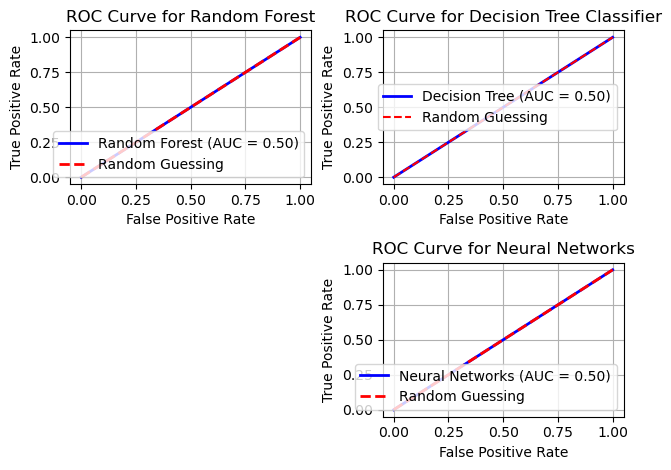

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.6min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 5.8min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 4.9min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_f

In [56]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) # assuming you have 3 classes

# Random Forest ROC Curve
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, 0], y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.subplot(2, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)

# Neural Networks ROC Curve
y_pred_proba_nn = mlp_classifier.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test_bin[:, 1], y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.subplot(2, 2, 4)
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='Neural Networks (AUC = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Networks')
plt.legend(loc='lower right')
plt.grid(True)

# Decision Tree ROC Curve
y_pred_dt_proba = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin[:, 2], y_pred_dt_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.subplot(2, 2, 2)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



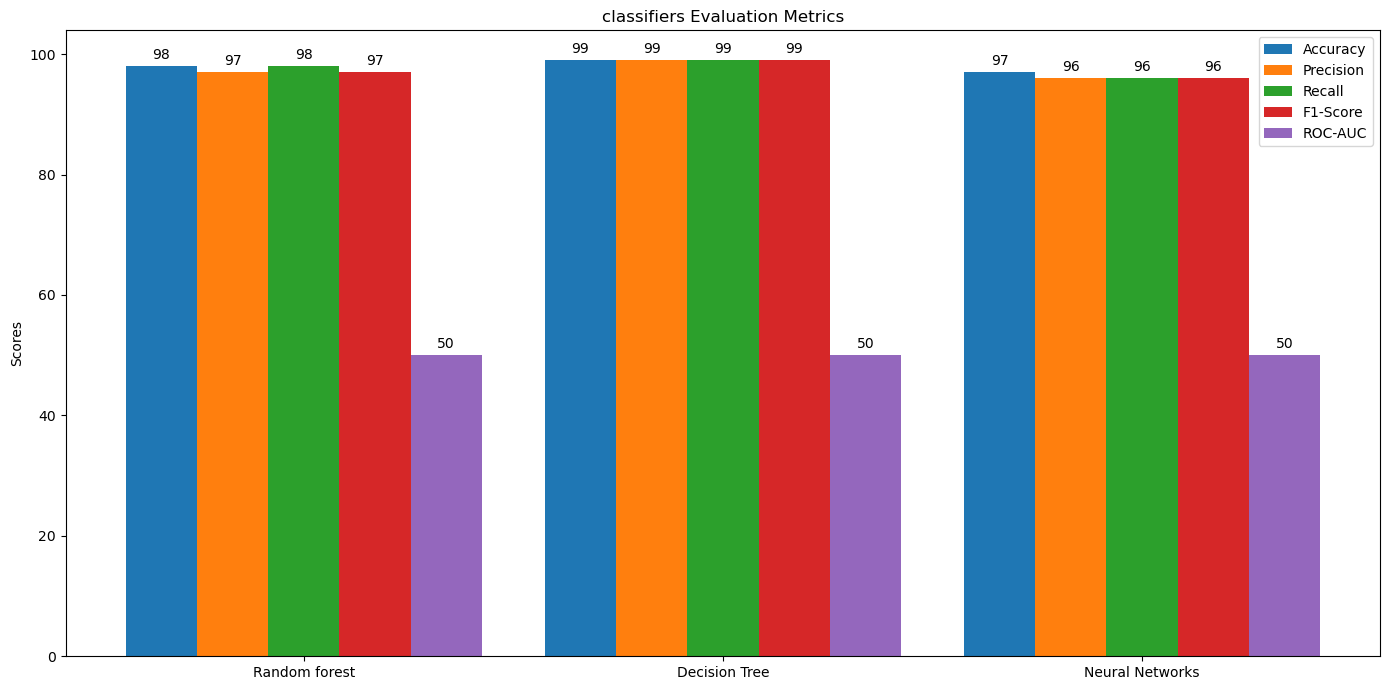

In [63]:
#comparing evaluation metrics for each model
classifiers = ['Random forest', 'Decision Tree', 'Neural Networks']
accuracy = [98,99,97]
precision = [97,99,96]
recall = [98,99,96]
f1_score = [97,99,96]
roc_auc = [50,50,50]

x = np. arange (len (classifiers) )
width = 0.17
fig, ax = plt.subplots (figsize=(14, 7))
rectas1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rectas2 = ax.bar(x - width, precision, width, label='Precision' )
rectas3 = ax. bar(x, recall, width, label='Recall')
rectas4 = ax.bar(x + width, f1_score, width, label='F1-Score')
rectas5 = ax.bar(x + 2*width, roc_auc, width, label='ROC-AUC')
ax.set_ylabel ('Scores')
ax.set_title( 'classifiers Evaluation Metrics')
ax.set_xticks (x)
ax.set_xticklabels (classifiers)
ax.legend()

def autolabel (rectas): 
    for rect in rectas:
        height = rect.get_height()
        ax.annotate('{}'. format (height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext= (0, 3),
                    textcoords="offset points", ha='center', va='bottom')
autolabel(rectas1)
autolabel(rectas2)
autolabel(rectas3)
autolabel(rectas4)
autolabel(rectas5)
fig.tight_layout ()
plt.show()